# Question 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import mat73
from numpy.linalg import eig


data_dict = np.array(mat73.loadmat('ques/data/mnist.mat'))
# print(data_dict)
# X = data_dict.item(0)['x']
# Y = data_dict.item(0)['y']

data_train = data_dict.item(0)['digits_train']
data_test = data_dict.item(0)['digits_test']
train_labels = data_dict.item(0)['labels_train']
test_labels = data_dict.item(0)['labels_test']

data_train = data_train.astype('float64')
data_train = data_train/255.0


data_train = data_train.reshape(28*28, 60000)
print(data_train.shape)

(784, 60000)


In [3]:
separateData = []
unique, frequency = np.unique(train_labels, return_counts=True)
for i in range(10):
    ls = []
    for j,k in enumerate(train_labels):
        if(i == k):
            ls.append(j)
    separateData.append(ls)

### **Some Notations** 
$\text{\textbf{meanList} : List containing the mean of all the images corresponding to an image}\\
\text{\textbf{maxEigenList} : Represents the list of max eigenvalues corresponding to the covariance matrix of each digit.}\\
\text{\textbf{covList} : List of covariance corresponding to each digit.}\\
\text{\textbf{maxVectorList} : Consists of eigenvectors along the maximal mode of variation for each digit.}$<br>

In [4]:
listEigenValues = []
meanList = []
maxVectorList = []
maxEigenList = []
covList = []
for i in range(len(separateData)):
    # print((separateData[i]))
    digit = data_train[:, np.array(separateData[i])]
    mean = np.sum(digit, axis = 1)/digit.shape[1]
    meanList.append(mean)
    cov = ((digit - mean.reshape(784,1))@(digit - mean.reshape(784,1)).T)/digit.shape[1]    
    covList.append(cov)
    
    eigenvalues, eigenvectors = eig(cov)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    maxEigenList.append(eigenvalues[np.argmax(eigenvalues)])
    maxVectorList.append(eigenvectors[:, np.argmax(eigenvalues)])
    eigenvalues = -np.sort(-eigenvalues)
    listEigenValues.append(eigenvalues)

# mean , covariance and the eigenvectors along maximal mode of variation has been computed for all the digits. 

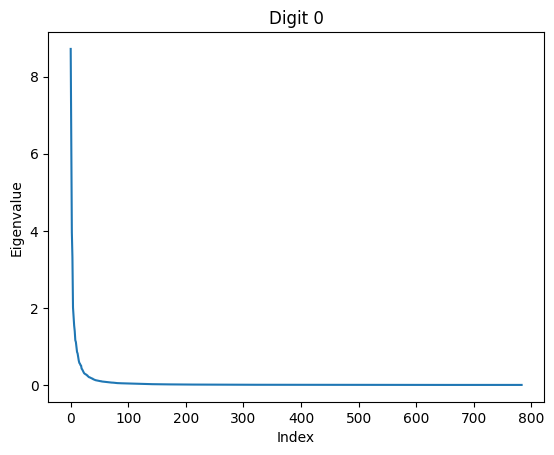

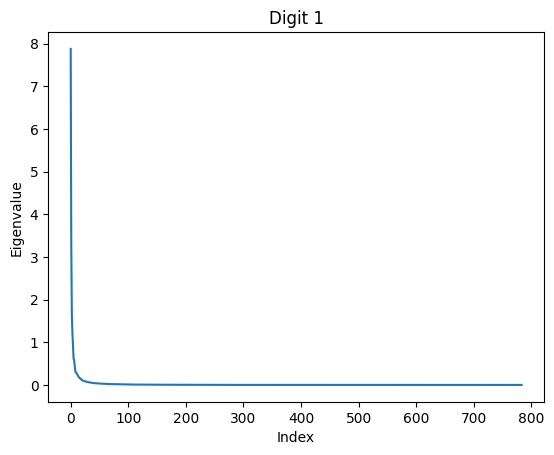

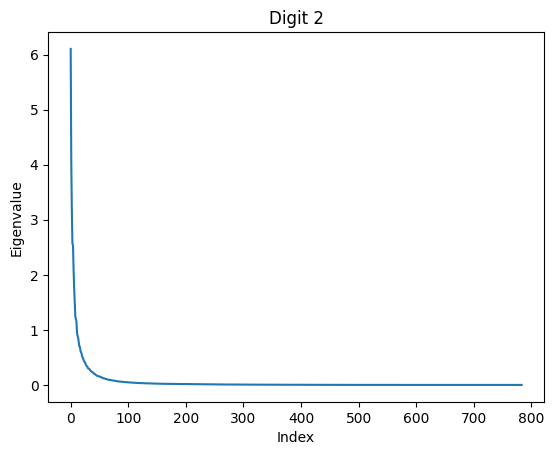

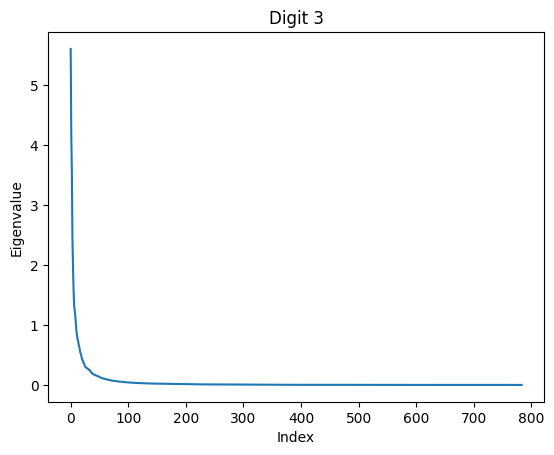

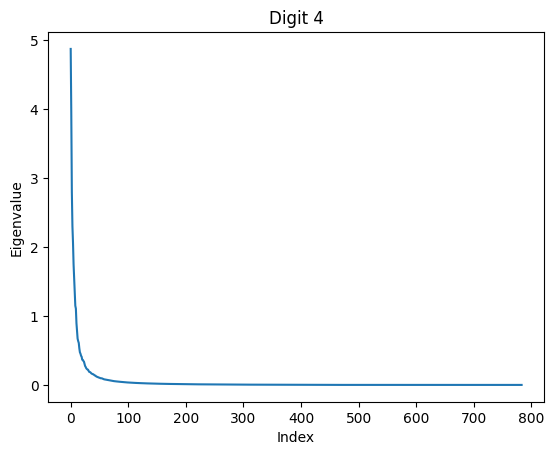

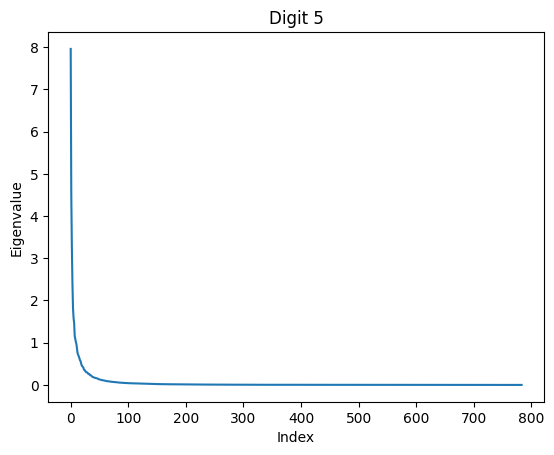

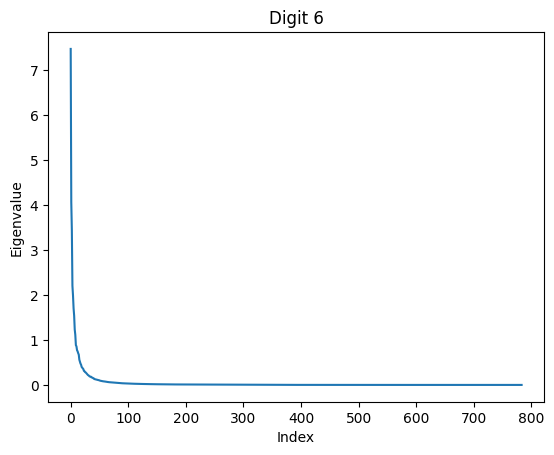

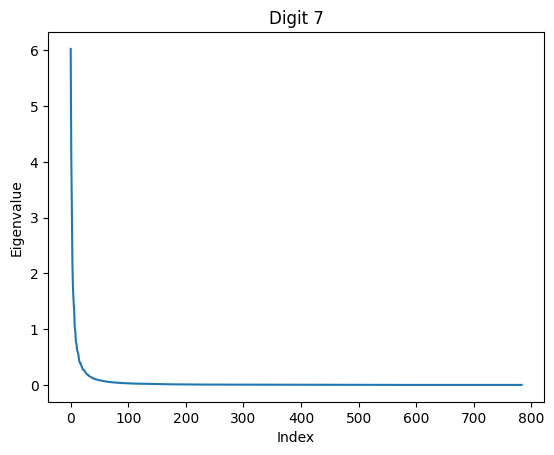

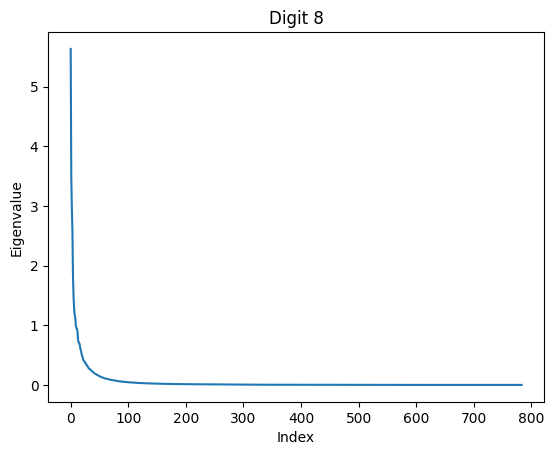

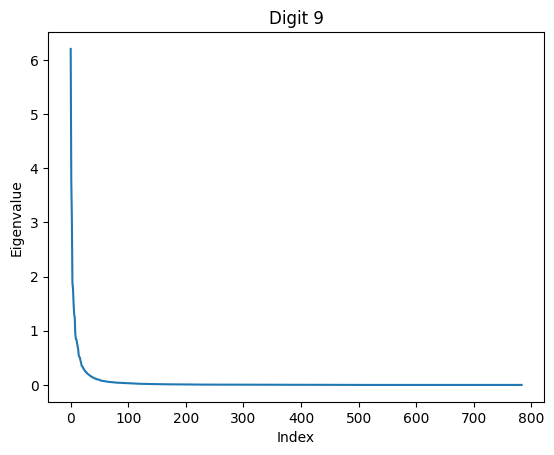

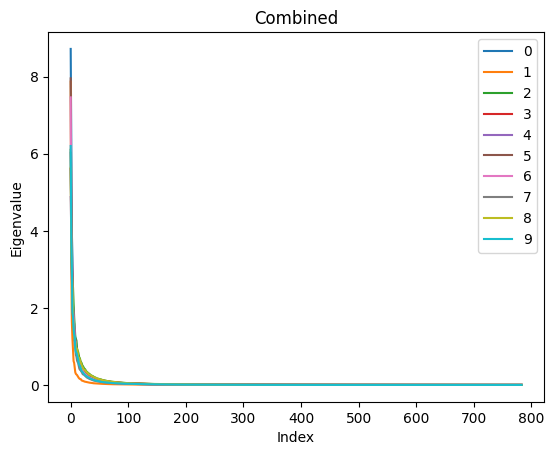

In [15]:
# plt.figure(figsize=(10, 10))
for i, j in enumerate(listEigenValues):
    # plt.subplot(5, 2, i+1)
    plt.plot(range(784), j)
    plt.ylabel("Eigenvalue")
    plt.xlabel("Index")
    plt.title(f"Digit {i}")
    plt.show()

for i, j in enumerate(listEigenValues):
    # plt.subplot(5, 2, i+1)
    plt.plot(range(784), j)
plt.legend("0123456789")
plt.ylabel("Eigenvalue")
plt.xlabel("Index")
plt.title(f"Combined")
plt.show()

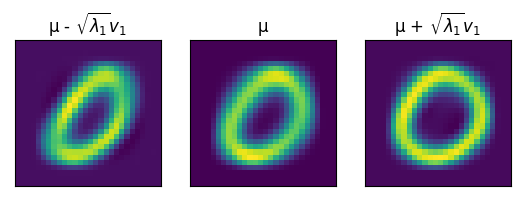

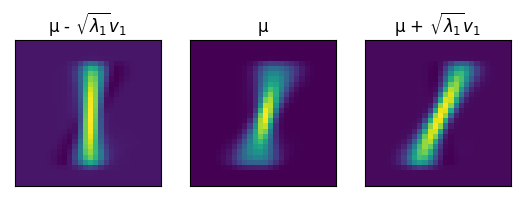

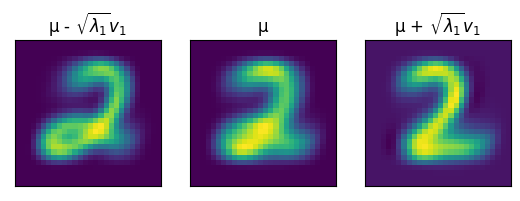

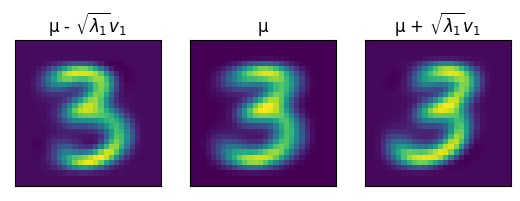

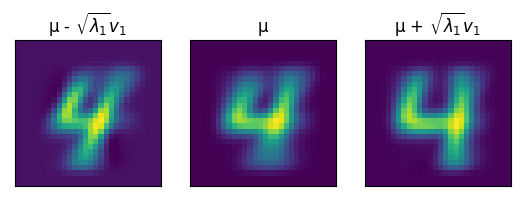

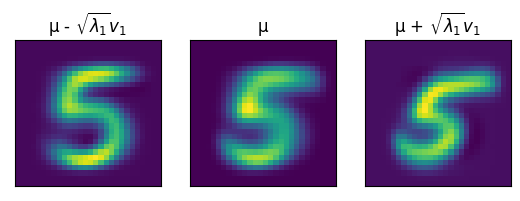

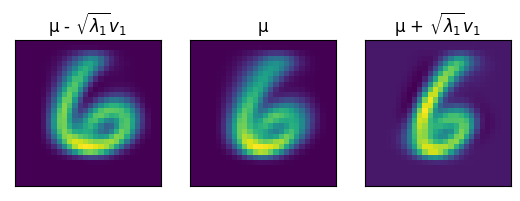

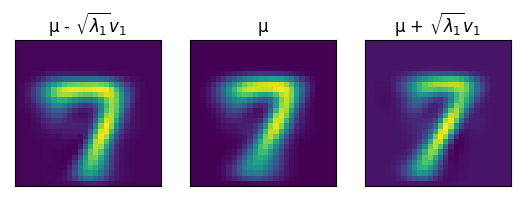

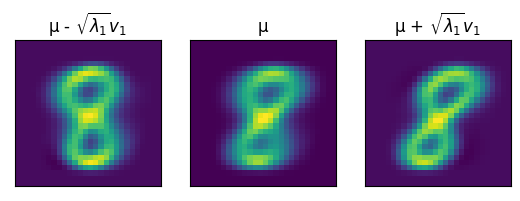

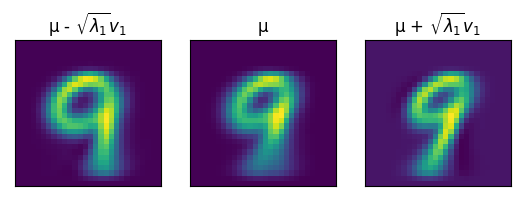

In [10]:
# print(len(meanList))
# print(len(maxEigenList))
# plt.figure(figsize=(10, 20))
for i in range(10):
    plt.subplot(1, 3, 1)
    plt.title(chr(956)+" - "+'$\sqrt{\lambda_1}v_1$'+'')
    plt.imshow((meanList[i] - math.sqrt(maxEigenList[i])*maxVectorList[i]).reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 2)
    plt.title(chr(956))
    plt.imshow(meanList[i].reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 3)
    plt.title(chr(956)+" + "+'$\sqrt{\lambda_1}v_1$'+'')
    plt.imshow((meanList[i] + math.sqrt(maxEigenList[i])*maxVectorList[i]).reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.show()